In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\sentiment analysis\reviews_data_dump\reviews_badminton\data.csv")
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [4]:
df.tail()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [5]:
df.shape


(8518, 8)

In [6]:
df.columns


Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

# data cleaning

In [7]:
df.isna().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
print(df.isna().sum())

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        0
Ratings            0
dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8013 entries, 0 to 8507
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8013 non-null   object 
 1   Review Title     8013 non-null   object 
 2   Place of Review  8013 non-null   object 
 3   Up Votes         8013 non-null   float64
 4   Down Votes       8013 non-null   float64
 5   Month            8013 non-null   object 
 6   Review text      8013 non-null   object 
 7   Ratings          8013 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 563.4+ KB


In [12]:
df["Month"] =pd.to_datetime(df["Month"],errors="coerce")

In [14]:
df['Up Votes'] =df['Up Votes'].astype(int)

In [15]:
df['Down Votes'] = df['Down Votes'].astype(int)

In [16]:
df.columns =df.columns.str.replace(' ','_')

In [17]:
print(df.dtypes)
print(df.columns)

Reviewer_Name              object
Review_Title               object
Place_of_Review            object
Up_Votes                    int32
Down_Votes                  int32
Month              datetime64[ns]
Review_text                object
Ratings                     int64
dtype: object
Index(['Reviewer_Name', 'Review_Title', 'Place_of_Review', 'Up_Votes',
       'Down_Votes', 'Month', 'Review_text', 'Ratings'],
      dtype='object')


In [18]:
df.describe()

,Up_Votes,Down_Votes,Ratings
count,8013.000000,8013.000000,8013.000000
mean,0.386747,0.123424,4.198178
std,11.849649,3.334320,1.244423
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,889.000000,219.000000,5.000000


In [19]:
print(df['Ratings'].value_counts())

5    4803
4    1659
1     688
3     575
2     288
Name: Ratings, dtype: int64


# Exploratory data analysis

# numerical analysis

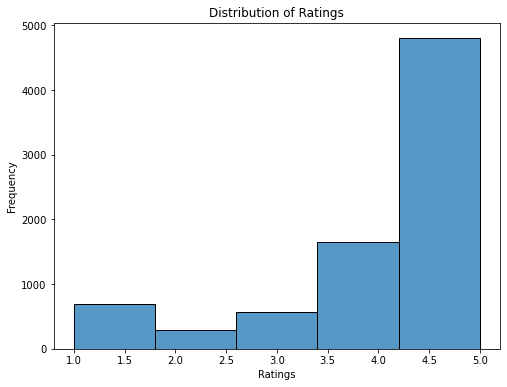

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Ratings'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()



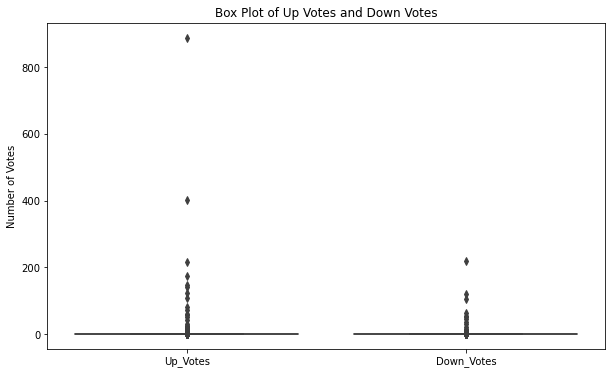

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Up_Votes', 'Down_Votes']])
plt.title('Box Plot of Up Votes and Down Votes')
plt.ylabel('Number of Votes')
plt.show()

# relationship between columns

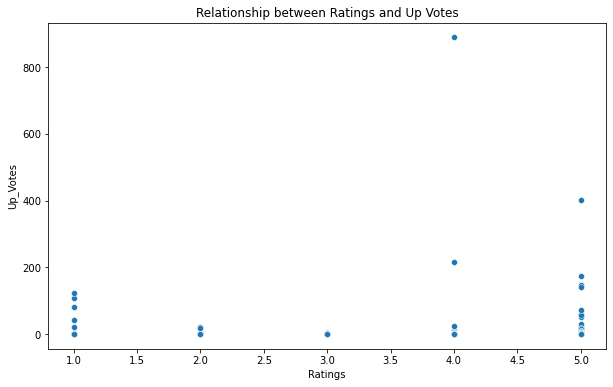

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ratings', y='Up_Votes')
plt.title('Relationship between Ratings and Up Votes')
plt.xlabel('Ratings')
plt.ylabel('Up_Votes')
plt.show()



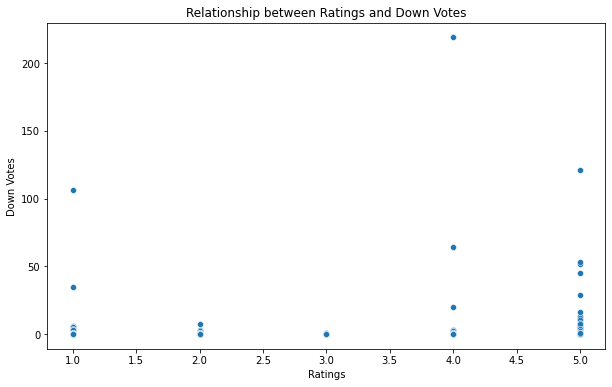

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ratings', y='Down_Votes')
plt.title('Relationship between Ratings and Down Votes')
plt.xlabel('Ratings')
plt.ylabel('Down Votes')
plt.show()


# catergorical analysis

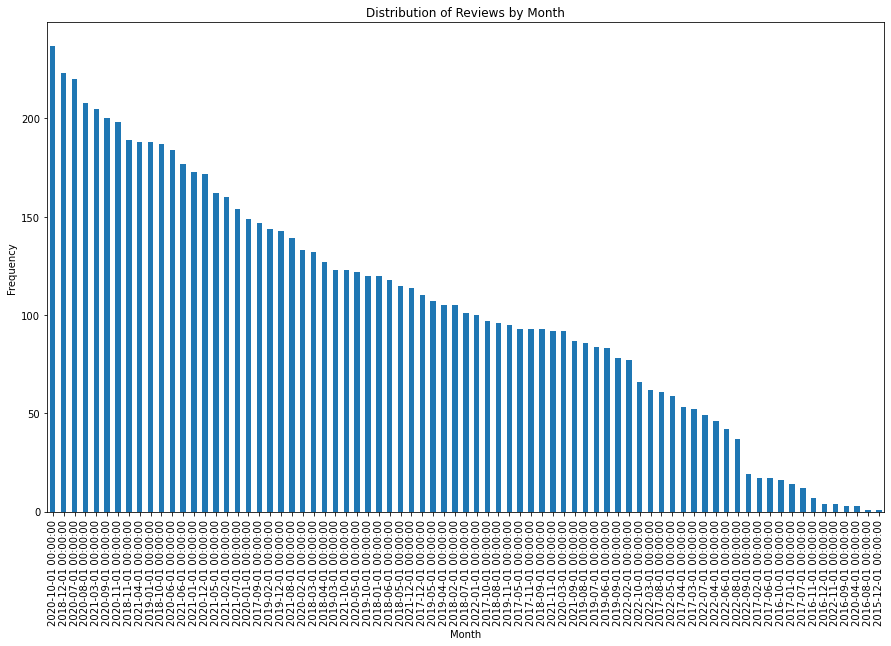

In [24]:
plt.figure(figsize=(15, 9))
df['Month'].value_counts().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Distribution of Reviews by Month')
plt.xticks(rotation=90)
plt.show()

In [25]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [28]:
def get_sentiment_nltk(text):
    if isinstance(text, str):
        scores = sid.polarity_scores(text)
        if scores['compound'] > 0:
            return 'Positive'
        elif scores['compound'] < 0:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral'

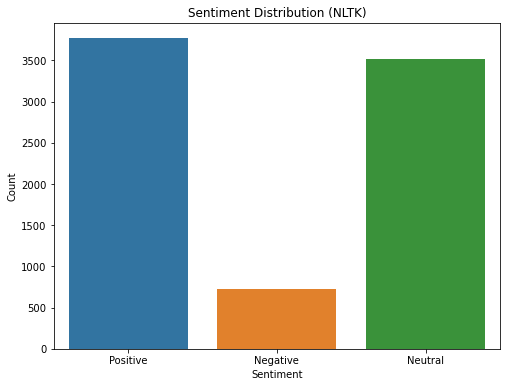

In [29]:
# Apply sentiment analysis to the 'Review_text' column
df['Sentiment_NLTK'] = df['Review_text'].apply(get_sentiment_nltk)
                                               
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_NLTK', data=df)
plt.title('Sentiment Distribution (NLTK)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [30]:
df['Sentiment_NLTK'].value_counts(normalize=True)

Positive    0.470361
Neutral     0.439037
Negative    0.090603
Name: Sentiment_NLTK, dtype: float64

In [31]:
df = df[df.Sentiment_NLTK != "Neutral"]

df.shape

(4495, 9)

In [32]:
df['Sentiment_NLTK'].value_counts(normalize=True)

Positive    0.838487
Negative    0.161513
Name: Sentiment_NLTK, dtype: float64

In [34]:
sentiment_mapping = {'Positive': 1, 'Negative': 0}
df['Sentiment_NLTK_numeric'] = df['Sentiment_NLTK'].map(sentiment_mapping)
print(df[['Sentiment_NLTK', 'Sentiment_NLTK_numeric']].head())


  Sentiment_NLTK  Sentiment_NLTK_numeric
0       Positive                       1
1       Negative                       0
2       Negative                       0
5       Positive                       1
6       Positive                       1


# Step 1 - Identify Input and Output

In [35]:
X = df.Review_text 
y = df.Sentiment_NLTK_numeric
print(X.shape, y.shape)

(4495,) (4495,)


# Step 2: Split the data into train and test

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3371,) (3371,)
(1124,) (1124,)


# step3: data preprocessing 

In [37]:
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
def clean(doc): # doc is a string of text
    # This text contains a lot of <br/> tags.
    doc = doc.replace("</br>", " ")
    
    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()
    
    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    
    # Join and return
    return " ".join(filtered_tokens)

In [41]:
 import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [42]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectorizer
vect = CountVectorizer(preprocessor=clean)

# use it to extract features from training data
%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

CPU times: total: 3.19 s
Wall time: 5.63 s
(3371, 2441)


# data preprocessing on (x_test)

In [43]:
X_test_dtm = vect.transform(X_test)

print(X_test_dtm.shape)

(1124, 2441)


# step 4: building a model

In [44]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")

CPU times: total: 0 ns
Wall time: 6.48 ms


MultinomialNB()

# step 5: evaluate metrics(train)

In [45]:
y_train_pred = nb.predict(X_train_dtm)

metrics.accuracy_score(y_train, y_train_pred)

0.9638089587659449

In [46]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[ 459,   86],
       [  36, 2790]], dtype=int64)

# step 6:evaluate(test)

In [48]:
y_test_pred = nb.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_test_pred)

0.9252669039145908

In [50]:
# # Understand that accuracy is influenced in the presence of data imbalance
# # Let's change the metric to F1 Score

print("Train Score (F1 Score):", metrics.f1_score(y_train, y_train_pred))

print("Test Score (F1 Score):", metrics.f1_score(y_test, y_test_pred))

Train Score (F1 Score): 0.9786039985969834
Test Score (F1 Score): 0.956745623069001


In [51]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

In [52]:
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ]
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [{'vectorization__preprocessor' : [clean],
                   'vectorization__max_features' : MAX_FEATURES, 
                   'nb__alpha' : ALPHA}]

clf = GridSearchCV(
    estimator=pipe, 
    param_grid=parameter_grid, 
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 1min 6s
Wall time: 2min 24s
Best estimator found on train set
Pipeline(steps=[('vectorization',
                 CountVectorizer(max_features=1000,
                                 preprocessor=<function clean at 0x000002A077C23EE0>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9584631360332295


In [53]:
import joblib
from joblib import Memory

import os

In [54]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ], 
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__preprocessor': [clean],
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 1min 3s
Wall time: 1min 59s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization',
                 CountVectorizer(max_features=1000,
                                 preprocessor=<function clean at 0x000002A077C23EE0>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9584631360332295


In [55]:
import os
os.getcwd()

'C:\\Users\\hp'

In [56]:
# Serialization

best_model = clf.best_estimator_

joblib.dump(best_model,r"C:\Users\hp\OneDrive\Desktop\sentiment analysis\demo_model_nb.pkl")

['C:\\Users\\hp\\OneDrive\\Desktop\\sentiment analysis\\demo_model_nb.pkl']

In [58]:
# Deserialization

model = joblib.load("C:\\Users\\hp\\OneDrive\\Desktop\\sentiment analysis\\demo_model_nb.pkl")
new_data = ["""4
Nice product

Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.
Kamal Suresh

Certified Buyer, Chirakkal

Feb, 2021

102775
1
Don't waste your money

They didn't supplied Yonex Mavis 350. Outside cover was Yonex Ad inside was a cheapest.... Sad to hear this.
Flipkart Customer

Certified Buyer, Hyderabad

Feb, 2021

19819
1
Did not meet expectations

Worst product. Damaged shuttlecocks packed in new box. It's not a original yonex product. Don't buy.flipkart platform is chosen to fraud the buyers.""","""Good quality product. Delivered on time."""]
prediction = model.predict(new_data)

print("Prediction:", prediction)

Prediction: [0 1]


In [59]:
# Let's analyse the models prediction time and model size

%time y_test_pred = model.predict(X_test)

print("Test Score (F1):", metrics.f1_score(y_test, y_test_pred))

CPU times: total: 547 ms
Wall time: 861 ms
Test Score (F1): 0.9584631360332295


In [61]:
print("Model Size:", os.path.getsize("C:\\Users\\hp\\OneDrive\\Desktop\\sentiment analysis\\demo_model_nb.pkl"),"Bytes")

Model Size: 80647 Bytes


In [63]:
%time X_train_clean = X_train.apply(lambda doc: clean(doc))

CPU times: total: 1.19 s
Wall time: 2.65 s


In [64]:
%time X_test_clean = X_test.apply(lambda doc: clean(doc))

CPU times: total: 453 ms
Wall time: 892 ms


In [65]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ], 
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train_clean, y_train)
print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_clean, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 3.38 s
Wall time: 7.83 s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9584631360332295


In [66]:
# Serialization

best_model = clf.best_estimator_

joblib.dump(best_model,"C:\\Users\\hp\\OneDrive\\Desktop\\sentiment analysis\\demo_model_nb.pkl")

['C:\\Users\\hp\\OneDrive\\Desktop\\sentiment analysis\\demo_model_nb.pkl']

In [67]:
# Deserialization

model = joblib.load("C:\\Users\\hp\\OneDrive\\Desktop\\sentiment analysis\\demo_model_nb.pkl")
new_data = ["""4
Nice product

Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.
Kamal Suresh

Certified Buyer, Chirakkal

Feb, 2021

102775
1
Don't waste your money

They didn't supplied Yonex Mavis 350. Outside cover was Yonex Ad inside was a cheapest.... Sad to hear this.
Flipkart Customer

Certified Buyer, Hyderabad

Feb, 2021

19819
1
Did not meet expectations

Worst product. Damaged shuttlecocks packed in new box. It's not a original yonex product. Don't buy.flipkart platform is chosen to fraud the buyers.""","""Good quality product. Delivered on time."""]
prediction = model.predict(new_data)

print("Prediction:", prediction)

Prediction: [1 1]


In [68]:
# Let's analyse the models prediction time and model size

%time y_test_pred = model.predict(X_test_clean)

print("Test Score (F1):", metrics.f1_score(y_test, y_test_pred))

CPU times: total: 0 ns
Wall time: 16.3 ms
Test Score (F1): 0.9584631360332295


In [70]:
print("Model Size:", os.path.getsize("C:\\Users\\hp\\OneDrive\\Desktop\\sentiment analysis\\demo_model_nb.pkl"),"Bytes")

Model Size: 80627 Bytes


# to find best model

In [71]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(X_train_clean, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 3.52 s
Wall time: 6.15 s
Score on Test Data:  0.9584631360332295
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 11.7 s
Wall time: 24 s
Score on Test Data:  0.9543355566957414
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 2min 31s
Wall time: 4min 43s
Score on Test Data:  0.9532908704883227


In [74]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.4,
                                    penalty='elasticnet', solver='saga'))])



In [75]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'C:\\Users\\hp\\OneDrive\\Desktop\\sentiment analysis\\{name}.pkl')
    model = joblib.load(f'C:\\Users\\hp\\OneDrive\\Desktop\\sentiment analysis\\{name}.pkl')
    
    %time y_test_pred = model.predict(X_test_clean)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred))
    
    print("Model Size:", os.path.getsize(f'C:\\Users\\hp\\OneDrive\\Desktop\\sentiment analysis\\{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: total: 0 ns
Wall time: 17.1 ms
Test Score (F1) 0.9584631360332295
Model Size: 80635 Bytes
********** decision_tree **********
CPU times: total: 0 ns
Wall time: 12.1 ms
Test Score (F1) 0.9543355566957414
Model Size: 71527 Bytes
********** logistic_regression **********
CPU times: total: 0 ns
Wall time: 14.1 ms
Test Score (F1) 0.9532908704883227
Model Size: 123205 Bytes
